<a href="https://colab.research.google.com/github/Maks6666/NeuralNetworks/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Input, Reshape
from keras.models import Model
import cv2

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

5


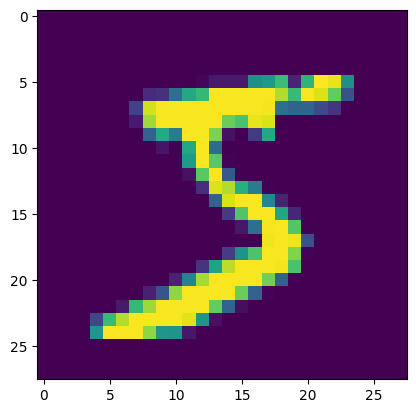

In [44]:
def output(x, y, itterations):
    for i in range(itterations):
        plt.imshow(x[i])
        print(y[i])
        plt.show()

output(x_train, y_train, 1)


In [45]:
x_train[0].shape

(28, 28)

In [46]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [47]:
x_train = x_train / 255
x_test = x_test / 255

In [48]:
# neurons on the first layer
28 * 28

784

In [65]:
# Functional API (instead of Sequential) example in encoder creating

# input data
encoder_input = Input(shape=(28, 28, 1), name="img")
# first layer
x = Flatten()(encoder_input)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
encoder_output = Dense(36, activation="relu")(x)

encoder = Model(encoder_input, encoder_output, name="encoder")

decoder_input = Dense(64, activation="relu")(encoder_output)
x = Dense(128, activation="relu")(decoder_input)
x = Dense(28 * 28, activation="sigmoid")(x)
decoder_output = Reshape((28, 28, 1))(x)



In [66]:
autoencoder = Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)

In [67]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 36)                2340      
                                                                 
 dense_25 (Dense)            (None, 64)                2368      
                                                                 
 dense_26 (Dense)            (None, 128)               

In [68]:
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1506
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1079
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0986
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0944
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0916


In [69]:
#x_test[0].reshape(-1, 28, 28, 1).shape
# -1 will automatically define how many values are in x_test - in this case just 1

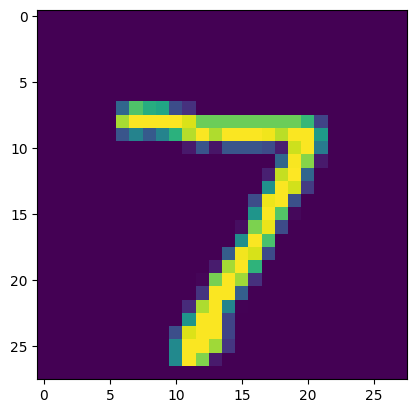

In [70]:
plt.imshow(x_test[0])

In [71]:
# encoder.predict([x_test[0].reshape(-1, 28, 28, 1)]) - will return array and [0] will take it first value
#whole array will be (64, 1) - where 1 - is batch (ammount of given examples)
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
example

1/1 [==============================] - 0s 48ms/step


array([ 5.1048903 ,  4.572786  ,  0.        ,  6.732081  ,  5.9147787 ,
        8.787018  ,  0.        , 10.273262  ,  5.560463  ,  0.        ,
        4.9220915 ,  5.687784  , 14.644182  ,  8.945023  ,  7.0690947 ,
        0.        ,  4.4020114 ,  0.        ,  0.        ,  9.79707   ,
        3.3518226 ,  5.320595  ,  1.5522182 ,  4.9608235 ,  0.95510346,
        4.833675  ,  9.636484  ,  1.1864502 ,  9.057852  ,  3.2577496 ,
        7.5278773 ,  0.7223719 ,  5.2163496 ,  0.        ,  6.678859  ,
        4.5808644 ], dtype=float32)

In [72]:
example.shape

(36,)

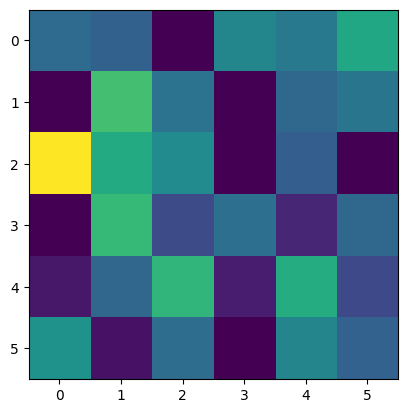

In [74]:
# output encoded image
plt.imshow(example.reshape((6, 6)))

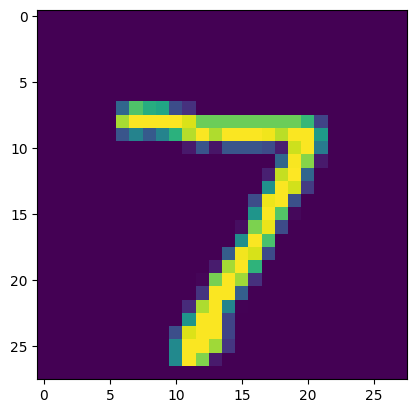

In [75]:
plt.imshow(x_test[0])

In [76]:
result = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

1/1 [==============================] - 0s 80ms/step


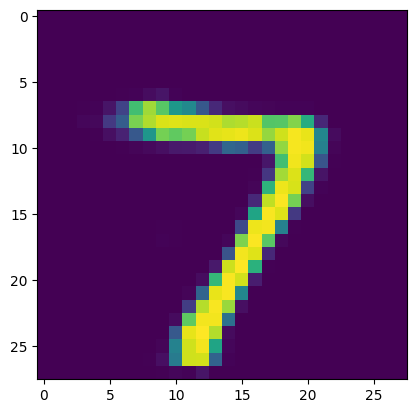

In [77]:
plt.imshow(result)

1/1 [==============================] - 0s 17ms/step


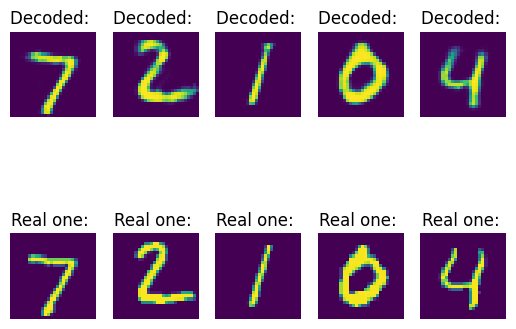

In [78]:
# subplot used to create subplotes in one single subplot

def output(itterations, subplotes):
    for i in range(itterations):
        plt.subplot(2, subplotes, i + 1)
        plt.title("Decoded: ")
        plt.imshow(autoencoder.predict(x_test[i].reshape(1, 28, 28, 1))[0])
        plt.axis('off')

        plt.subplot(2, subplotes, i + 1 + subplotes)
        plt.title("Real one: ")
        plt.imshow(x_test[i])
        plt.axis('off')

    plt.show()

output(5, 5)


In [79]:
# test autoencoder with some image noise

import random

def add_noise(img, random_chance=5):
    # create an array as a new image
    noisy = []
    for row in img:
        # itterate through each row of image
        new_row=[]
        # itterate through each pixel of image
        for pix in row:
          # assing a probability, should code change value of each pixel or no
          #  random.choice(range(100)) is smaller than random_chance, then it will
            if random.choice(range(100)) <= random_chance:
                # randow float value between 0 and 1
                new_val = random.uniform(0, 1)
                # insert new value into row
                new_row.append(new_val)
            # if loop is False, then pix remains and returns to row array
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

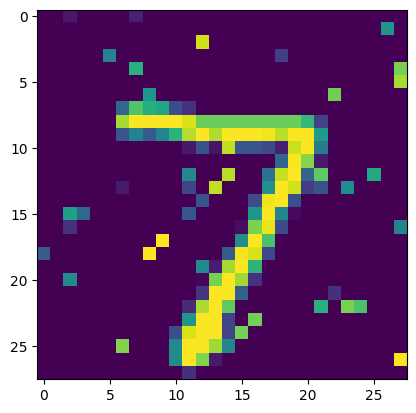

In [81]:
noisy = add_noise(x_test[0])
plt.imshow(noisy)

In [83]:
result = autoencoder.predict([noisy.reshape(1, 28, 28, 1)])[0]

1/1 [==============================] - 0s 64ms/step


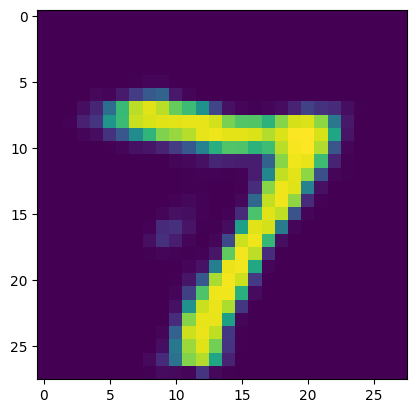

In [84]:
plt.imshow(result)